In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import time
import threading
import math

# Insertion sort

In [1]:
def inserting_sort(unsorted_array):
    for index in range(1, len(unsorted_array)):

        current_value = unsorted_array[index]
        position = index

        while position > 0 and unsorted_array[position - 1] > current_value:
            unsorted_array[position] = unsorted_array[position - 1]
            position = position - 1

        unsorted_array[position] = current_value

# Merge sort

In [2]:
def merg_sort(unsorted_Array):

    # if the length of array is 1 or 0 that array is sorted
    if len(unsorted_Array) == 1 or len(unsorted_Array) == 0:
        return unsorted_Array

    elif len(unsorted_Array) > 1:
        mid = len(unsorted_Array) // 2  # find the middile of array
        # the left side of array: from index = 0 to middile of array
        Left = unsorted_Array[:mid]
        # the right side of array: from middile + 1 to end of array
        Right = unsorted_Array[mid:]

        merg_sort(Left)
        merg_sort(Right)

        i = 0        # Initial index of left side
        j = 0        # Initial index of right side
        k = 0        # Initial index of merged subarray

        # data to temp arrays Left[] and Right[]
        while i < len(Left) and j < len(Right):
            if Left[i] < Right[j]:
                unsorted_Array[k] = Left[i]
                i += 1
            else:
                unsorted_Array[k] = Right[j]
                j += 1
            k += 1

        # checking if any element was Left
        while i < len(Left):
            unsorted_Array[k] = Left[i]
            i += 1
            k += 1

        # checking if any element was Right
        while j < len(Right):
            unsorted_Array[k] = Right[j]
            j += 1
            k += 1

# Analysis

In [4]:
def random_array_gen(i):
    arr = []
    
    for j in range(i):
        arr.append(np.random.uniform(i))
        
    return arr

In [ ]:
time.time()
time.time()

1678350262.3404775

In [34]:
def timer(time_chart, i):

    print(f"starting {i}th array")
    
    arr1 = []
    arr2 = []
    arr1 = random_array_gen(i)
    arr2 = arr2.copy()
    
    start_insertion = time.time()
    inserting_sort(arr1)
    end_insertion = time.time()
    
    start_merge = time.time()
    merg_sort(arr2)
    end_merge = time.time()
    
    time_chart.append([i, end_insertion - start_insertion, end_merge - start_merge])

In [ ]:
time_chart = []
thread = []

for i in range(100, 5000):

    thread.append(threading.Thread(timer(time_chart, i)))
    thread[-1].start()
    
    if len(time_chart) % 100 == 0:
        tmp = np.asarray(time_chart)
        np.save("./time_chart.npy", tmp)

In [40]:
times = np.asarray(time_chart)

Text(0.5, 1.0, 'N^2')

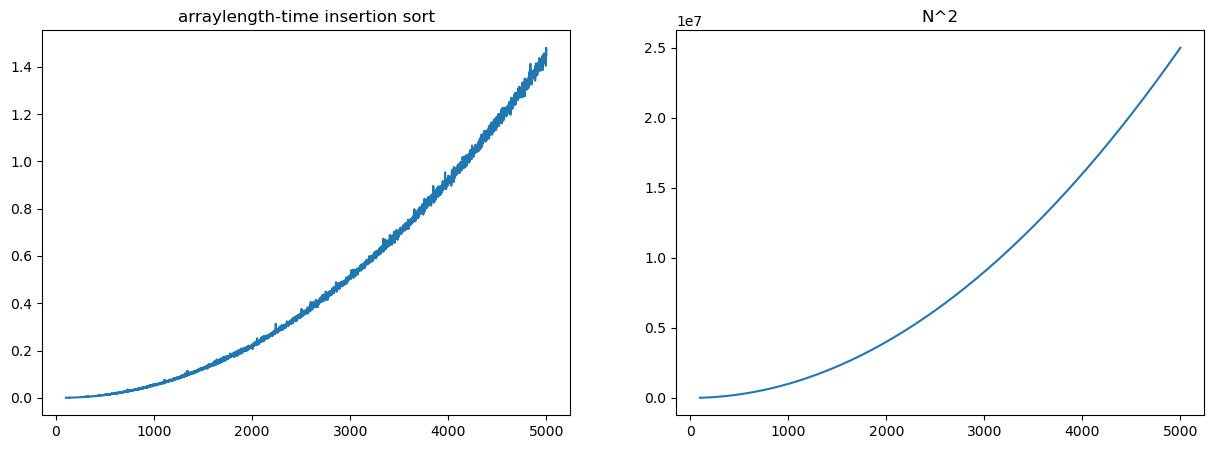

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(times[:, 0], times[:, 1])
plt.title("arraylength-time insertion sort")
plt.subplot(122)
plt.plot(times[:, 0], [(i**2) for i in range(100, 5000)])
plt.title("N^2")

the upper chart shows that insertion sort is O(n^2)

Text(0.5, 1.0, 'arraylength-time merge sort')

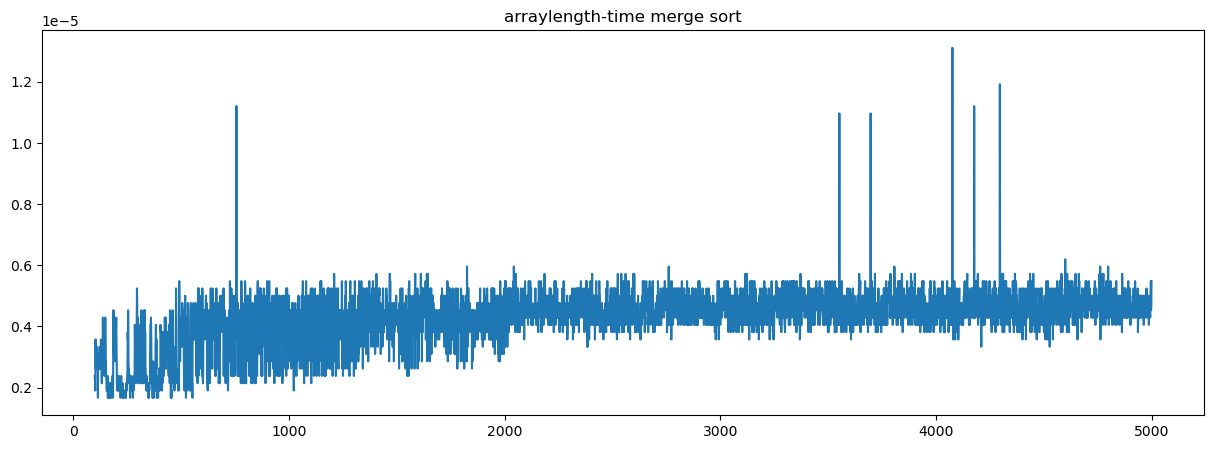

In [129]:
plt.figure(figsize=(15,5))
plt.plot(times[:, 0], times[:, 2])
plt.title("arraylength-time merge sort")

In [97]:
max(times[:, 2])

1.3113021850585938e-05

In [130]:
times = times[times[:, 2]<.000008]

In [137]:
times.shape

(4894, 3)

Text(0.5, 1.0, 'N^2')

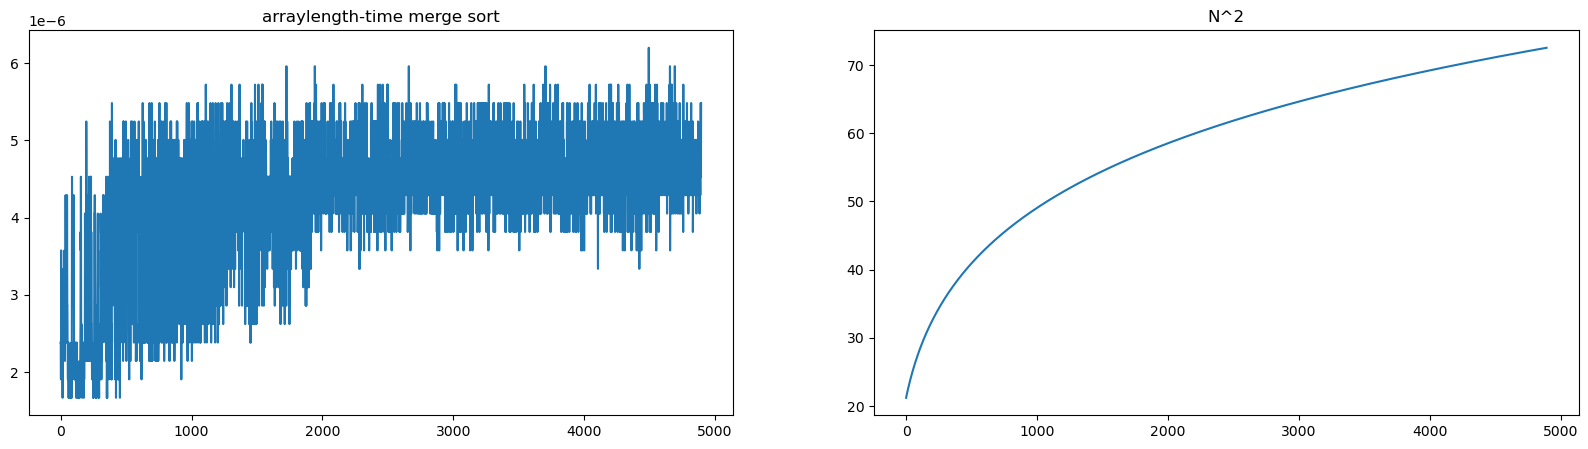

In [141]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(range(len(times)), times[:, 2])
plt.title("arraylength-time merge sort")
plt.subplot(122)
plt.plot(range(len(times)), [(math.log(i)**2) for i in range(100, 4994)])
plt.title("N^2")

the upper plot shows logarithmic effect

# Treshold

In [181]:
def func(t, a, b, c):
    return a * np.log(b * t) + c

In [211]:
y = func(times[:, 0], 1, 1.3, -5)

In [212]:
insert_poly = np.polyfit(times[:, 0], times[:, 1], 5)
popt, pcov = curve_fit(func, times[:, 0], y)

to fit a logarithmic function we use scypy *the polyfit did not work well*

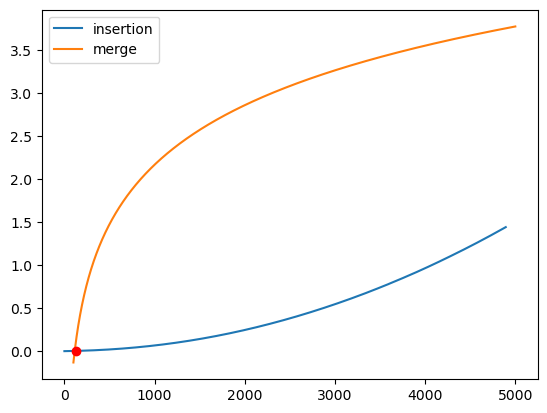

In [222]:
plt.plot(np.polyval(insert_poly, times[:, 0]), label='insertion')
plt.plot(times[:, 0], func(times[:, 0], *popt), label="merge")
plt.plot(128, 0, "ro")
plt.legend()

the calculated treshold is 128